In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import segysak
import xarray as xr

from segysak.segy import get_segy_texthead, well_known_byte_locs, segy_header_scan

## Załadowanie danych SEG-Y

In [2]:
data_path = r'X:\dane_pum_cw10\TNE01_Full\TNE01_Full'
V3D_path = pathlib.Path(data_path)
print("3D", V3D_path, V3D_path.exists())

3D X:\dane_pum_cw10\TNE01_Full\TNE01_Full True


In [3]:
segy_header = get_segy_texthead(V3D_path)
segy_header

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2019.4 Wednesday, October 21 2020 14:19:53          
C 2 Name: TNE01_FULL ÝRealized¨ 1 Type: 3D seismic                              
C 3                                                                             
C 4 First inline: 362    Last inline: 1540                                      
C 5 First xline:  908    Last xline:  3880                                      
C 6 CRS: ST_ED50_UTM31N_P23031_T1133 ÝStatoil,2100005¨                          
C 7 X min: 531854.62 max: 563388.48 delta: 31533.86                             
C 8 Y min: 6731674.15 max: 6771202.25 delta: 39528.10                           
C 9 Time min: -4000.00 max: 4.00 delta: 4004.00                                 
C10 Lat min: 60.42'51.1341"N max: 61.04'22.1371"N delta: 0.21'31.0031"          
C11 Long min: 3.35'1.5768"E max: 4.10'28.3122"E delta: 0.35'26.7354"            
C12 Trace min: -3998.00 max: 2.00 delta: 4000.00                                
C13 Seismic (template) min: -304.74 max: 302.36 delta: 607.11                   
C14 Amplitude (data) min: -304.74 max: 302.36 delta: 607.11                     
C15 Trace sample format: IEEE floating point                                    
C16 Coordinate scale factor: 10.00000                                           
C17                                                                             
C18 Binary header locations:                                                    
C19 Sample interval             : bytes 17-18                                   
C20 Number of samples per trace : bytes 21-22                                   
C21 Trace date format           : bytes 25-26                                   
C22                                                                             
C23 Trace header locations:                                                     
C24 Inline number               : bytes 5-8                                     
C25 Xline number                : bytes 21-24                                   
C26 Coordinate scale factor     : bytes 71-72                                   
C27 X coordinate                : bytes 73-76                                   
C28 Y coordinate                : bytes 77-80                                   
C29 Trace start time/depth      : bytes 109-110                                 
C30 Number of samples per trace : bytes 115-116                                 
C31 Sample interval             : bytes 117-118                                 
C32                                                                             
C33                                                                             
C34                                                                             
C35                                                                             
C36                                                                             
C37                                                                             
C38                                                                             
C39                                                                             
C40 END EBCDIC

#### Czytanie sejsmicznych headerów (metadane)


In [4]:
scan = segy_header_scan(V3D_path)
scan[scan['std'] > 0]

Processing Chunks:   0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/1.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
TraceNumber,13,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
CDP,21,1000.0,1.907000e+03,577.638872,908.0,1407.50,1907.0,2406.50,2906.0
SourceX,73,1000.0,5.570523e+06,36537.740701,5507333.0,5538928.25,5570523.5,5602118.50,5633714.0
SourceY,77,1000.0,6.749913e+07,62278.028634,67391426.0,67445279.25,67499133.0,67552986.00,67606840.0
CDP_X,181,1000.0,5.570523e+06,36537.740701,5507333.0,5538928.25,5570523.5,5602118.50,5633714.0
CDP_Y,185,1000.0,6.749913e+07,62278.028634,67391426.0,67445279.25,67499133.0,67552986.00,67606840.0
CROSSLINE_3D,193,1000.0,1.907000e+03,577.638872,908.0,1407.50,1907.0,2406.50,2906.0


#### Ustawianie lokalizacji bajtów do odróżnienia nagłówków od danych

In [5]:
byte_locs = well_known_byte_locs("petrel_3d")
byte_locs

{'iline': 5, 'xline': 21, 'cdp_x': 73, 'cdp_y': 77}

In [6]:
byte_locs["iline"]

5

In [7]:
cube = xr.open_dataset(
    V3D_path,
    engine="sgy_engine",
    dim_byte_fields={"iline": byte_locs["iline"],
                     "xline": byte_locs["xline"]},
    extra_byte_fields={"cdp_x": byte_locs["cdp_x"],
                       "cdp_y": byte_locs["cdp_y"]},
)

Processing Chunks:   0%|          | 0.00/9.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/77.3k [00:00<?, ? traces/s]

In [8]:
cube

<xarray.Dataset>
Dimensions:  (iline: 590, xline: 1487, samples: 1001)
Coordinates:
  * iline    (iline) int16 362 364 366 368 370 372 ... 1532 1534 1536 1538 1540
  * xline    (xline) int16 908 910 912 914 916 918 ... 3872 3874 3876 3878 3880
  * samples  (samples) float32 -2.0 2.0 6.0 ... 3.99e+03 3.994e+03 3.998e+03
Data variables:
    cdp_x    (iline, xline) int32 ...
    cdp_y    (iline, xline) int32 ...
    data     (iline, xline, samples) float32 ...
Attributes:
    seisnc:   {"coord_scalar": -10.0, "coord_scaled": false}

#### Wykres jednej płaszczyzny danych 3D (samples vs xline)


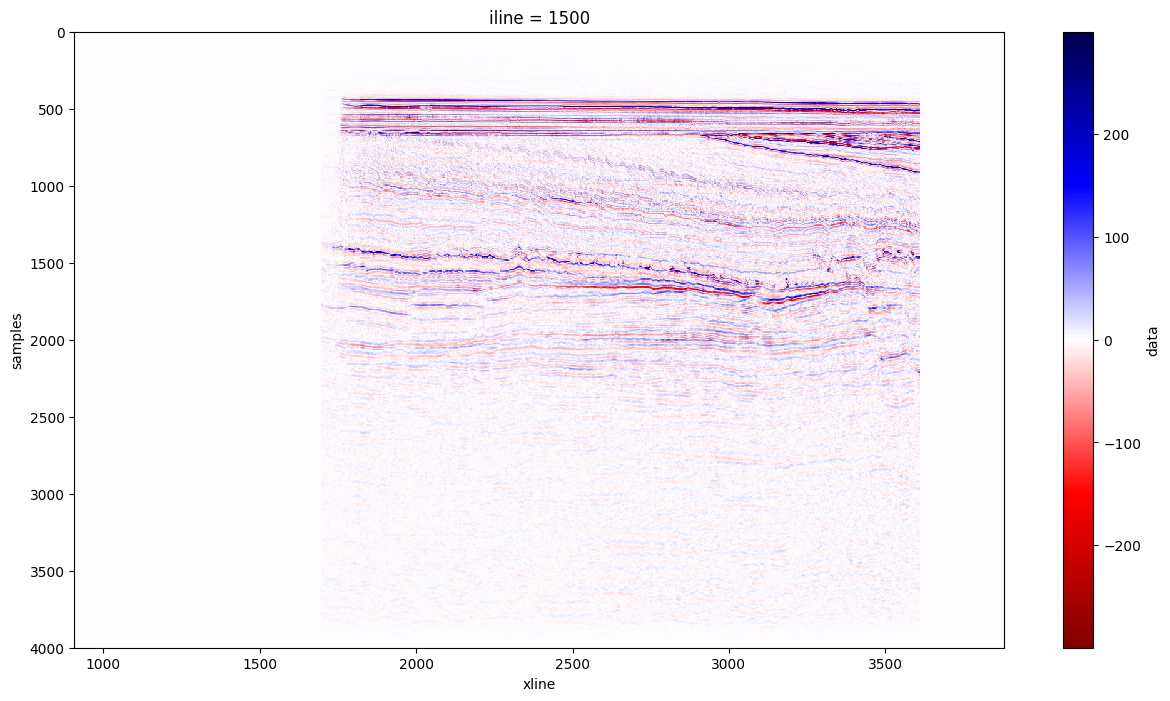

In [9]:
fig, ax = plt.subplots(ncols=1, figsize=(15,8))
iline_sel = 1500
_ = cube.data.transpose("samples", "iline", "xline", transpose_coords=True) \
    .sel(iline=iline_sel) \
    .plot(yincrease=False, cmap='seismic_r')

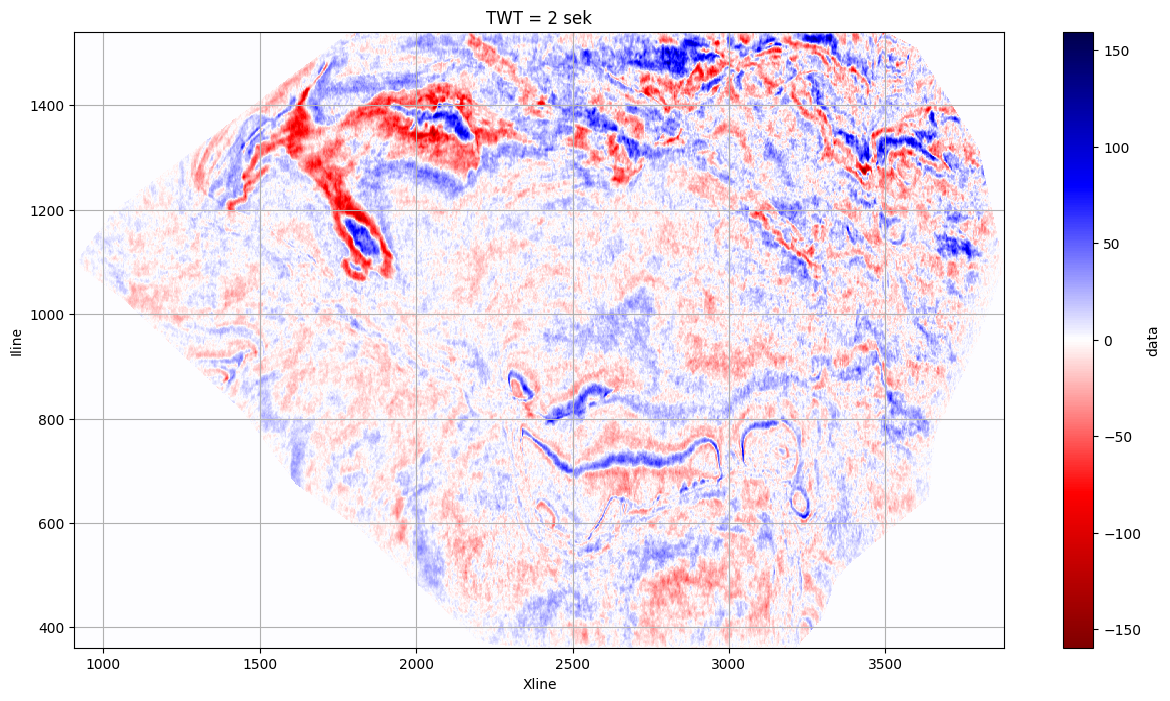

In [10]:
twt_value = 1998
data_at_twt = cube.data.sel(samples=twt_value, method='nearest')

fig, ax = plt.subplots(ncols=1, figsize=(15,8))
data_at_twt.transpose("iline", "xline", transpose_coords=True) \
    .plot(ax=ax, cmap='seismic_r')
plt.grid("grey")
plt.ylabel("Iline")
plt.xlabel("Xline")
plt.title(f"TWT = 2 sek")
plt.show()

In [11]:
iline_range = (500, 1400)
xline_range = (2000, 3000)
twt_range = (1900, 2100)
V3D = cube.sel(
    iline=slice(*iline_range),
    xline=slice(*xline_range),
    samples=slice(*twt_range)
)
V3D

<xarray.Dataset>
Dimensions:  (iline: 451, xline: 501, samples: 50)
Coordinates:
  * iline    (iline) int16 500 502 504 506 508 510 ... 1392 1394 1396 1398 1400
  * xline    (xline) int16 2000 2002 2004 2006 2008 ... 2992 2994 2996 2998 3000
  * samples  (samples) float32 1.902e+03 1.906e+03 ... 2.094e+03 2.098e+03
Data variables:
    cdp_x    (iline, xline) int32 ...
    cdp_y    (iline, xline) int32 ...
    data     (iline, xline, samples) float32 ...
Attributes:
    seisnc:   {"coord_scalar": -10.0, "coord_scaled": false}

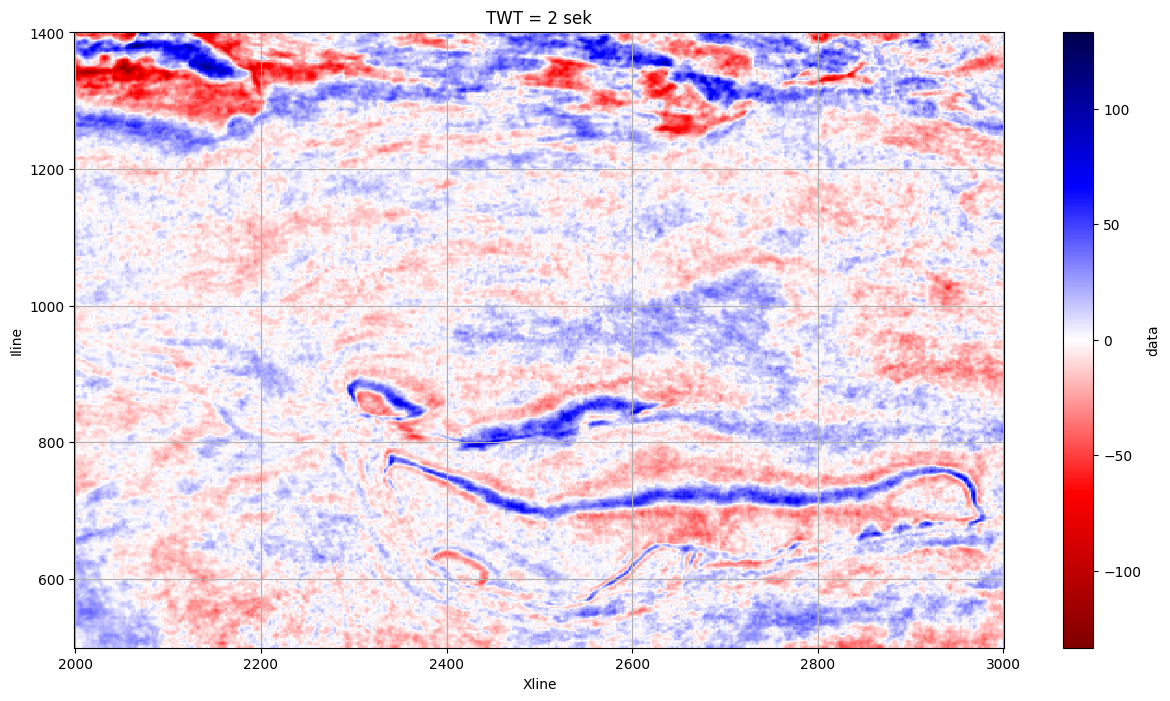

In [12]:
twt_value = 1998
V3D_p = V3D.data.sel(samples=twt_value, method='nearest')

fig, ax = plt.subplots(ncols=1, figsize=(15,8))
V3D_p.transpose("iline", "xline", transpose_coords=True) \
    .plot(ax=ax, cmap='seismic_r')
plt.grid("grey")
plt.ylabel("Iline")
plt.xlabel("Xline")
plt.title(f"TWT = 2 sek")
plt.show()

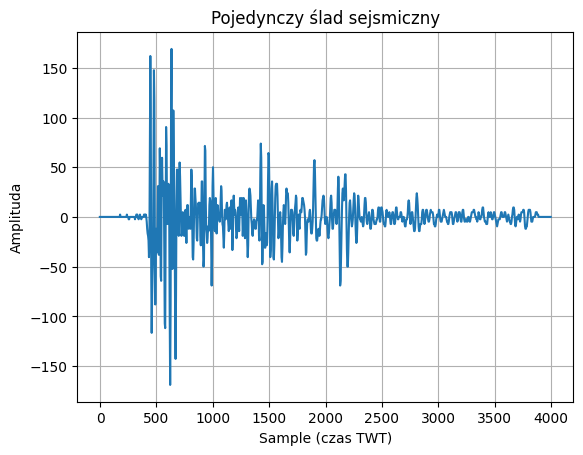

In [13]:
trace = cube.data.sel(iline=1000, xline=2500)
trace.plot()
plt.xlabel("Sample (czas TWT)")
plt.ylabel("Amplituda")
plt.title("Pojedynczy ślad sejsmiczny")
plt.grid()
plt.show()

### Konwersja danych do numpy

In [14]:
V3D_np = V3D['data'].transpose("iline", "xline", "samples").values

In [15]:
V3D_np

array([[[ -4.7616096,  -2.3808048,   0.       , ...,  -4.7616096,
          -7.1424146,  -2.3808048],
        [ -4.7616096,  -4.7616096,  -2.3808048, ...,  -7.1424146,
          -4.7616096,  -4.7616096],
        [ -7.1424146,  -4.7616096,  -4.7616096, ...,  -9.523219 ,
          -4.7616096,   0.       ],
        ...,
        [  4.7616096,  -2.3808048,  -4.7616096, ...,  -7.1424146,
          -2.3808048,   0.       ],
        [  7.1424146,   4.7616096,   0.       , ..., -11.904024 ,
          -2.3808048,   4.7616096],
        [  4.7616096,   0.       ,  -4.7616096, ...,  -7.1424146,
           0.       ,   2.3808048]],

       [[  0.       ,   0.       ,   0.       , ...,  -4.7616096,
          -7.1424146,  -4.7616096],
        [ -2.3808048,   0.       ,   2.3808048, ...,  -4.7616096,
          -2.3808048,  -4.7616096],
        [ -4.7616096,  -2.3808048,  -2.3808048, ...,  -9.523219 ,
          -4.7616096,   0.       ],
        ...,
        [  7.1424146,  -2.3808048,  -7.1424146, ...,  

### Dodanie dodatkowych atrybutów
- Amplituda: Siła odbicia fali sejsmicznej.
- Obwiednia (Envelope): Siła odbicia, niezależna od fazy. Wskazuje na ogólną energię sygnału.
- Faza chwilowa (Instantaneous Phase): Pomaga w śledzeniu ciągłości reflektorów.
- Częstotliwość chwilowa (Instantaneous Frequency): Może wskazywać na zmiany w grubości warstw lub właściwościach ośrodka.

In [32]:
from scipy.signal import hilbert

In [33]:
slice_idx = 37
slice_2d = V3D_np[:, :, slice_idx]

In [34]:
analytic_signal = hilbert(slice_2d)
envelope = np.abs(analytic_signal)
instantaneous_phase = np.angle(analytic_signal)
instantaneous_frequency = np.diff(np.unwrap(instantaneous_phase), axis=0)
instantaneous_frequency = np.pad(instantaneous_frequency, ((0,1),(0,0)), mode='edge')

In [35]:
features = np.stack([slice_2d, envelope,
                     instantaneous_phase,
                     instantaneous_frequency],
                    axis=-1)

X = features.reshape(-1, features.shape[-1]) # wektor kolumnowy (N, 1) — kmeans działa na wektorach
# liczymy klasteryzację na uzyskanych cechach


### Porównanie użytych metod klasteryzacji

| K-means                            | Fuzzy C-Means                                                 |
|----------------------------------|---------------------------------------------------------------|
| **Twarda** klasteryzacja         | **Rozmyta** (fuzzy) klasteryzacja                             |
| Każdy punkt należy do jednego klastra | Każdy punkt ma stopnie przynależności                         |
| Pojedyncza etykieta na punkt     | Macierz przynależności (prawdopodobieństwa)                   |
| Wyraźne granice                  | Płynne przejścia między klastrami                             |
| Szybka, prosta                   | Lepsza przy niejednoznaczności/szumie, pobiera więcej zasobów |




### Klasteryzacja K-means

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed
from tqdm import tqdm

In [37]:
ks = range(2, 8)

def compute_silhouette(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    score = silhouette_score(X, labels, sample_size=10000, random_state=42)
    return score

silhouette_scores = Parallel(n_jobs=-1)(
    delayed(compute_silhouette)(k) for k in tqdm(ks, desc="Computing silhouette scores")
)

Computing silhouette scores: 100%|██████████| 6/6 [00:00<00:00, 1998.72it/s]


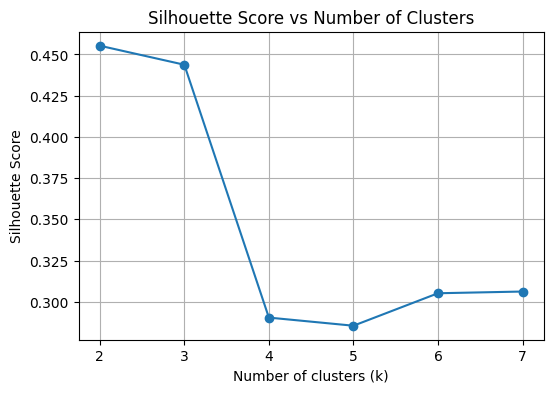

In [38]:
plt.figure(figsize=(6, 4))
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

In [39]:
best_k = ks[np.argmax(silhouette_scores)]
print(f"Best number of clusters: {best_k} (Silhouette Score = {max(silhouette_scores):.4f})")

Best number of clusters: 2 (Silhouette Score = 0.4553)


In [40]:
n_clusters = best_k
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Rekonstrukcja etykiet do oryginalnego rozmiaru 2D
clustered_slice = labels.reshape(slice_2d.shape)

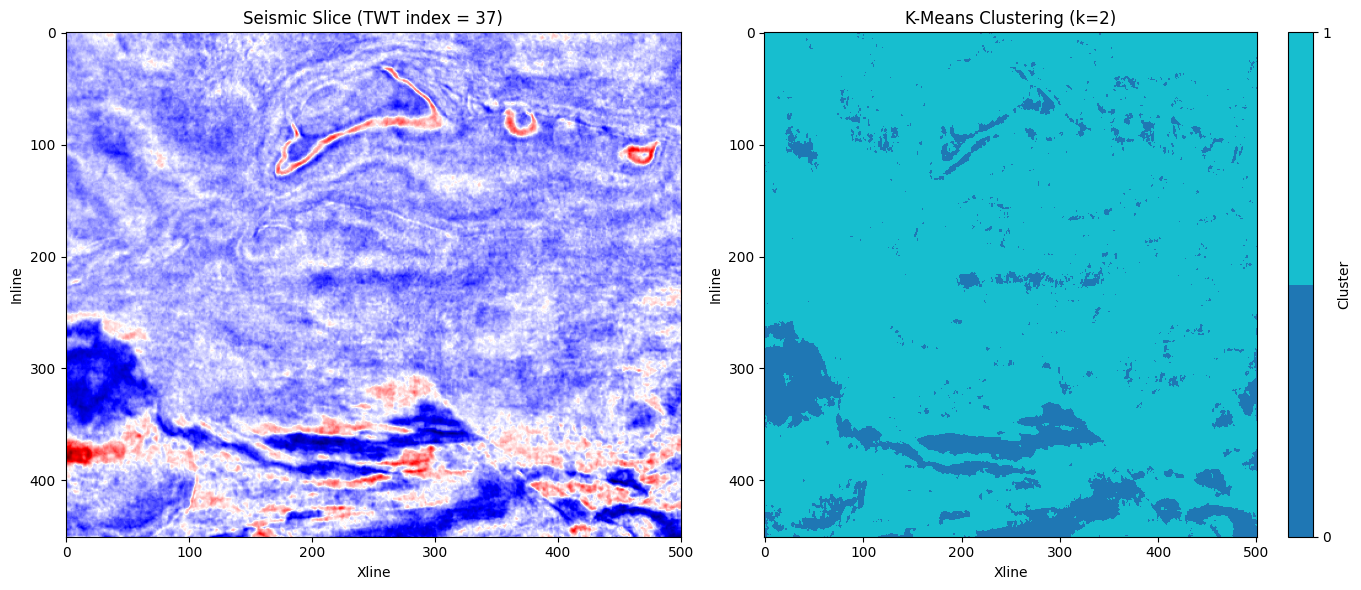

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Oryginalny slice sejsmiczny
ax[0].imshow(slice_2d, cmap='seismic', aspect='auto')
ax[0].set_title(f"Seismic Slice (TWT index = {slice_idx})")
ax[0].set_xlabel("Xline")
ax[0].set_ylabel("Inline")

# Klasteryzacja
cmap = plt.get_cmap('tab10', n_clusters)
im = ax[1].imshow(clustered_slice, cmap=cmap, aspect='auto')
ax[1].set_title(f"K-Means Clustering (k={n_clusters})")
ax[1].set_xlabel("Xline")
ax[1].set_ylabel("Inline")

plt.colorbar(im, ax=ax[1], ticks=np.arange(n_clusters), label="Cluster")
plt.tight_layout()
plt.show()


### Klasteryzacja fuzzy c-means

In [42]:
import skfuzzy as fuzz

In [43]:
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T,  #transponujemy: (features, samples)
    c=n_clusters,
    m=2.0,
    error=0.005,
    maxiter=1000,
    init=None,
    seed=42
)

# U to macierz przynależności (shape: n_clusters x n_samples)
# Etap przypisania każdego piksela do klastra o największej przynależności
labels = np.argmax(u, axis=0)

# Rekonstrukcja mapy etykiet do oryginalnego rozmiaru
clustered_slice_fcm = labels.reshape(slice_2d.shape)

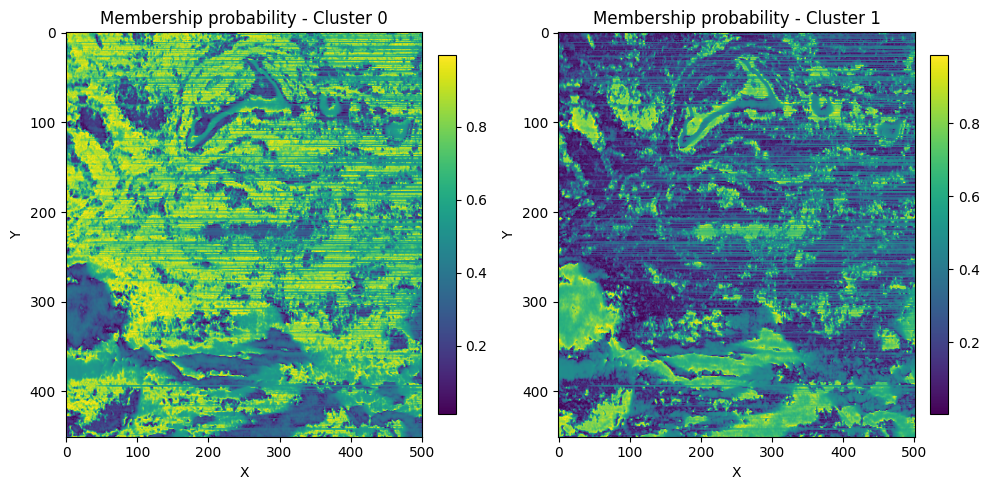

In [45]:
membership_maps = u.reshape((n_clusters, *slice_2d.shape))

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 5))

for i in range(n_clusters):
    ax = axes[i]
    im = ax.imshow(membership_maps[i], cmap="viridis", aspect="auto")
    ax.set_title(f"Membership probability - Cluster {i}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

Dla tego zbioru danych klasteryzacja Fuzzy C-Means jest bardziej wartościowa, ponieważ jej "miękkie" podejście pozwala na subtelne wydzielenie stref anomalnych (potencjalnych ciał geologicznych) od tła.

Wybrana przy użyciu metody Silhoutte liczba klastrów pozwala tylko na binarną klasyfikację tła i anomalii. Patrząc jednak na wyniki klasteryzacji, możemy zauważyć, że sekcje zakwalifikowane jako anomalia niekoniecznie są do siebie podobne - na niższych wysokościach mamy struktury większe, bardziej skupione, a wyżej bardziej kręte. Mimo że najlepszy Silhoutte score miały dwa klastry, wydaje się, że 3 mogłyby być bardziej odpowiednie.

Uzyskane wyniki wskazują na potencjał metody automatycznej klasyfikacji litofacji i przy poprawie liczbie klastrów, większych zasobach obliczeniowych i dodaniu wymiaru czasowego do klasteryzacji może być ona bardzo pomocna.
